In [1]:
from sklearn.model_selection import  GridSearchCV

In [2]:
from sklearn.model_selection import  RandomizedSearchCV

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris=pd.read_csv("/content/iris.csv")

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.shape

(150, 5)

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
X=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=iris['species']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, 
                                                    random_state = 0)
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [13]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(112, 4) (38, 4)
(112,) (38,)


In [14]:
 # Cross validation
 # Gtidsearchcv
 from sklearn.model_selection import GridSearchCV
 from sklearn.model_selection import RandomizedSearchCV

 from sklearn.metrics import classification_report

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
tuned_parameters = [{'n_neighbors':[i for i in range(1,51)],'p':[1,2,3]}]
clf =GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid=tuned_parameters,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [17]:
print(clf.best_params_)
print(clf.best_estimator_)
print('Score on the Test Data:',clf.score(X_test,y_test))

{'n_neighbors': 6, 'p': 3}
KNeighborsClassifier(n_neighbors=6, p=3)
Score on the Test Data: 0.9736842105263158


In [18]:
cv_results=pd.DataFrame(clf.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005462,0.001935,0.006498,0.002842,1,1,"{'n_neighbors': 1, 'p': 1}",0.956522,0.913043,1.0,...,0.946640,0.033305,79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003551,0.000473,0.006990,0.004887,1,2,"{'n_neighbors': 1, 'p': 2}",0.956522,0.913043,1.0,...,0.946640,0.033305,79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.005890,0.004686,0.007642,0.003464,1,3,"{'n_neighbors': 1, 'p': 3}",0.956522,0.913043,1.0,...,0.946640,0.033305,79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.005825,0.004422,0.008376,0.004759,2,1,"{'n_neighbors': 2, 'p': 1}",0.913043,0.826087,1.0,...,0.920553,0.057583,138,0.955056,0.966292,0.955556,0.966667,0.966667,0.962047,0.005508
4,0.006544,0.004272,0.007438,0.003383,2,2,"{'n_neighbors': 2, 'p': 2}",0.913043,0.869565,1.0,...,0.929249,0.044445,125,0.966292,0.966292,0.955556,0.977778,0.966667,0.966517,0.007030


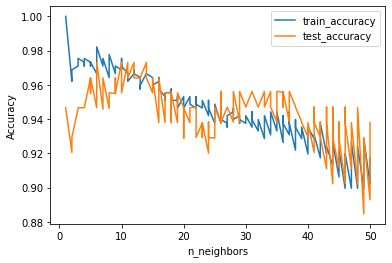

In [19]:
plt.plot(cv_results['param_n_neighbors'],cv_results['mean_train_score'])
plt.plot(cv_results['param_n_neighbors'],cv_results['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','test_accuracy'],loc='upper right')

In [27]:
 #RandomizedsearchCV
 tuned_parameters= [{'n_neighbors':[i for i in range(1,51)],'p':[1,2,3]}]
 clf = RandomizedSearchCV(
     estimator=KNeighborsClassifier(),
     param_distributions=tuned_parameters,
     scoring='accuracy',
     cv=5,
     return_train_score=True
 )
 clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='accuracy')

In [28]:
print("Best parameters  set found on the train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print('score on the Test  data:',clf.score(X_test,y_test))

Best parameters  set found on the train set:
{'p': 2, 'n_neighbors': 11}
KNeighborsClassifier(n_neighbors=11)
score on the Test  data: 0.9736842105263158
